In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# 이미지 제너레이터 만들기
trainGen = ImageDataGenerator(rescale=1./255)
trainGen = trainGen.flow_from_directory('data/손글씨/train',target_size=(28,28), class_mode='categorical', batch_size=2)

testGen = ImageDataGenerator(rescale=1./255)
testGen = testGen.flow_from_directory('data/손글씨/test',target_size=(28,28), class_mode='categorical', batch_size=2)

Found 170 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [33]:
# 모델 생성
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10)

In [36]:
model.fit_generator(trainGen, steps_per_epoch=85, epochs=100, callbacks=[es], validation_data=testGen)

Epoch 1/100
85/85 [==============================] - 1s 8ms/step - loss: 1.6334 - accuracy: 0.1765 - val_loss: 1.6068 - val_accuracy: 0.2200
Epoch 2/100
85/85 [==============================] - 0s 5ms/step - loss: 1.6172 - accuracy: 0.1471 - val_loss: 1.6168 - val_accuracy: 0.2400
Epoch 3/100
85/85 [==============================] - 0s 5ms/step - loss: 1.6152 - accuracy: 0.1765 - val_loss: 1.5955 - val_accuracy: 0.2000
Epoch 4/100
85/85 [==============================] - 0s 5ms/step - loss: 1.6177 - accuracy: 0.2118 - val_loss: 1.5981 - val_accuracy: 0.2100
Epoch 5/100
85/85 [==============================] - 0s 5ms/step - loss: 1.6145 - accuracy: 0.1882 - val_loss: 1.6153 - val_accuracy: 0.2800
Epoch 6/100
85/85 [==============================] - 0s 6ms/step - loss: 1.5510 - accuracy: 0.3471 - val_loss: 2.1466 - val_accuracy: 0.4600
Epoch 7/100
85/85 [==============================] - 0s 5ms/step - loss: 1.2812 - accuracy: 0.4882 - val_loss: 0.6207 - val_accuracy: 0.5000
Epoch 8/100
8

In [38]:
valLoss = model.history.history['val_loss']
testLoss = model.history.history['loss']

valAcc = model.history.history['val_accuracy']
testAcc = model.history.history['accuracy']

In [40]:
import matplotlib.pyplot as plt

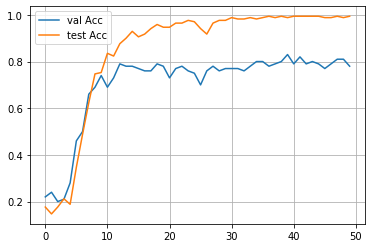

In [42]:
plt.plot(range(len(valAcc)), valAcc, label='val Acc')
plt.plot(range(len(testAcc)), testAcc, label='test Acc')

plt.grid()
plt.legend()

plt.show()

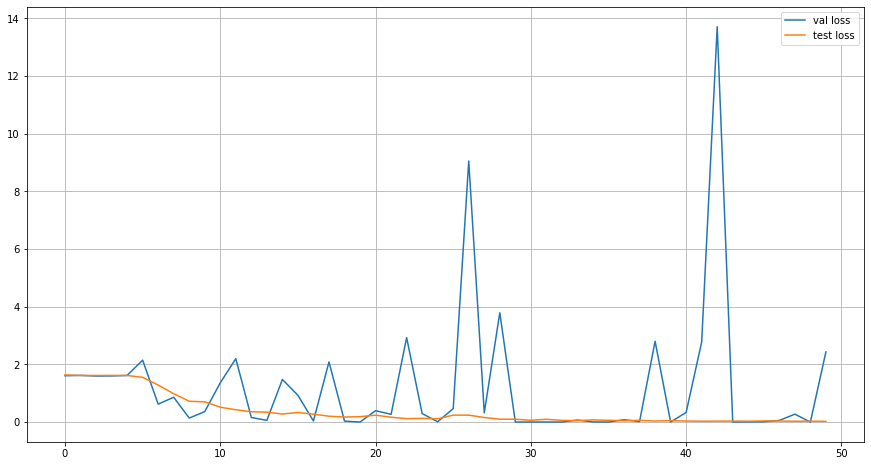

In [43]:
plt.figure(figsize=(15,8))
plt.plot(range(len(valLoss)), valLoss, label='val loss')
plt.plot(range(len(valLoss)), testLoss, label='test loss')

# plt.plot(range(len(valAcc)), valAcc, label='val Acc')
# plt.plot(range(len(testAcc)), testAcc, label='test Acc')

plt.grid()
plt.legend()

plt.show()

In [44]:
model.evaluate_generator(testGen)

[2.4323737621307373, 0.7799999713897705]

In [47]:
import numpy as np

In [56]:
print("-- Predict --")
output = model.predict_generator(testGen, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(testGen.class_indices)
print(output)
print(testGen.filenames)

-- Predict --
{'aa': 0, 'da': 1, 'ga': 2, 'ka': 3, 'sa': 4}
[[0.000 0.000 0.000 0.000 1.000]
 [1.000 0.000 0.000 0.000 0.000]
 [0.031 0.948 0.019 0.000 0.002]
 [0.048 0.950 0.002 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 1.000]
 [0.008 0.000 0.422 0.570 0.000]
 [0.000 0.000 0.417 0.583 0.000]
 [0.619 0.000 0.000 0.000 0.381]
 [0.000 0.000 0.000 1.000 0.000]]
['aa\\aa_bc_03_02.jpg', 'aa\\aa_chj_03_14.jpg', 'aa\\aa_cjh_03_12.jpg', 'aa\\aa_cyh_03_09.jpg', 'aa\\aa_edy_03_18.jpg', 'aa\\aa_gjh_03_05.jpg', 'aa\\aa_hmr_03_15.jpg', 'aa\\aa_jhe_03_07.jpg', 'aa\\aa_jsy_03_06.jpg', 'aa\\aa_kgw_03_04.jpg', 'aa\\aa_kka_03_01.jpg', 'aa\\aa_kkh_03_16.jpg.jpg', 'aa\\aa_kth_03_11.jpg', 'aa\\aa_lsc_01_10.jpg', 'aa\\aa_lsc_02_10.jpg', 'aa\\aa_lsc_03_10.jpg', 'aa\\aa_ojm_03_08.jpg', 'aa\\aa_pkh_03_03.jpg', 'aa\\aa_say_03_17.jpg', 'aa\\aa_ykw_03_13.jpg', 'da\\da_bc_03_02.jpg', 'da\\da_chj_03_14.jpg', 'da\\da_cjh_03_12.jpg', 'da\\da_cyh_03_09.jpg', 'da\\da_edy_03_18.jpg', 'da\\d